In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def nextlog(x,r):
    return r*x*(1-x)

def genarateseq(seed, r, length):
    temp = seed
    seq = []
    for i in range(length):
        nextterm = nextlog(temp,r)
        if abs(nextterm)>1:
            return seq
        seq.append(nextterm)
        temp = nextterm
    return seq

def normalize(seq):
    out = [0 for i in range(len(seq))]
    for i in range(len(seq)):
        out[i] = int((seq[i]*256)%256)
    return out

def PSeq(img, seed, r):
    M,N = img.shape[0], img.shape[1] 
    length = M*N
    return normalize(genarateseq(seed, r, length))

def confuse(imgseq, Pseq, N):
    
    confused = [imgseq[0]^Pseq[0]]
    for i in range(1,len(imgseq)):
        val = Pseq[i]^((Pseq[i]+imgseq[i])%N)^confused[i-1]
        confused.append(val)
    return confused
    


In [3]:
img = cv.imread("lenna.png")[:,:,0]
M,N = img.shape[0], img.shape[1]
Pseq = PSeq(img, 0.2456789, 3.99967) # 3.57<r<4 Randomness

In [4]:
imgseq = img.reshape(1,M*N)

In [5]:
z = np.array(confuse(imgseq, Pseq,N)).reshape(M,N)

In [6]:
cv.imshow("s",z)
cv.waitKey(0)
cv.destroyAllWindows()

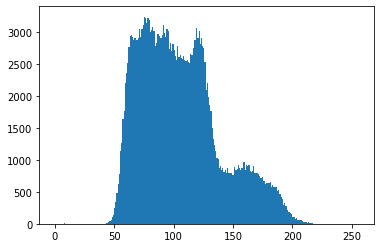

In [7]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

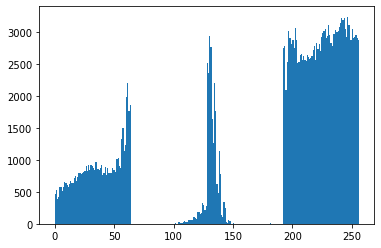

In [8]:
plt.hist(z.ravel(),256,[0,256]); plt.show()

In [45]:
np.array([1,2,3,4,5,6]).reshape(2,3)

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
cv.imwrite("grey.png", z)

True